In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [310]:
os.chdir('D:\\SurfDrive\\backup_for_surfacePro\\FELion-Spectrum-Analyser\\testing\\DATA')
os.listdir()

['16_11_18-2.felix',
 '16_11_18-2.pow',
 '16_11_18-3.felix',
 '16_11_18-3.pow',
 '16_11_18-4.felix',
 '16_11_18-4.pow',
 '16_11_18-6.felix',
 '16_11_18-6.pow',
 '19_11_18-7.felix',
 '19_11_18-7.pow',
 '19_11_18-8.felix',
 '19_11_18-8.pow',
 '19_11_18-9.felix',
 '19_11_18-9.pow',
 'basefile.base']

In [76]:
def felix_read_file(fname):
    file = np.genfromtxt(fname)
    wn, count, sa = file[:,0], file[:,2], file[:,3]
    data = wn, count, sa
    data = np.take(data, data[0].argsort(), 1)
    return data

def felix_read_file1(fname):
    """
    Reads data from felix meassurement file
    Input: filename
    Output: data[0,1]   0 - wavenumber, 1 - intensity
    """
    
    sa_factor = 1.0
    #open file and skip sharps
    wl, cnt, sa = [],[],[]
    f = open(fname)
    for line in f:
        if line[0] == '#':
            if line.find("3HARM")==1:
                sa_factor=2.0
            continue
        else:
            if len(line.split()) < 4: continue;
            x, y, z, q, *rest = line.split()
            wl.append(float(x))
            cnt.append(float(z))
            sa.append(float(q)*sa_factor)
    
    f.close()
    data = np.array([wl, cnt, sa])

    indices = data[0].argsort()
    wl_min_f = data[0][indices[0]]
    wl_max_f = data[0][indices[-1]]
    print("--------------------------------------------------------------------------------")
    print('FILE: ', fname, '\tWavelength in file:' , wl_min_f, '-', wl_max_f, 'PONTS: ', len(data[0][:]))
    
    res = np.take(data, indices, 1)
    return res

--------------------------------------------------------------------------------
FILE:  16_11_18-2.felix 	Wavelength in file: 550.09655 - 1799.999856 PONTS:  625


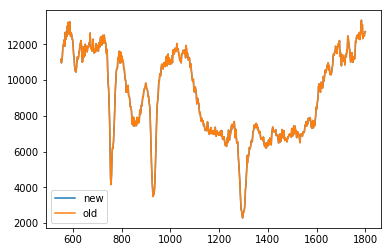

In [77]:
data = felix_read_file('16_11_18-2.felix')
data1 = felix_read_file1('16_11_18-2.felix')

plt.plot(data[0], data[1], label = 'new')
plt.plot(data1[0], data1[1], label = 'old')
plt.legend()

In [301]:
baseline=None

def GuessBaseLine1(data, PPS=5, NUM_POINTS=18):

    """
    Guesses the baseline according to real points in the datafile.
    makes NUM_POINTS baseline defining points 
    """
    max_n = len(data[0]) - PPS
    Bx, By = [data[0][0]-0.1], [data[1][0]]             #NOTE teh 0.1 is here to be 
    #sure all the frequencies are in baseline calib. range
    for i in range(0, max_n, int(max_n/NUM_POINTS)):
        x = data[0][i:i+PPS].mean()
        y = data[1][i:i+PPS].mean()
        #print('x = data[0][%i:%i]'%(i, i+PPS))
        Bx.append(x)
        By.append(y)
    Bx.append(data[0][-1]+0.1)
    By.append(data[1][-1])
    
    #print('\nPPS: %i\nNUM_POINTS: %i\nlen(data[0]) %i\nmax_n: %i\n'%(PPS, NUM_POINTS, len(data[0]), max_n))

    return np.array(Bx), np.array(By)

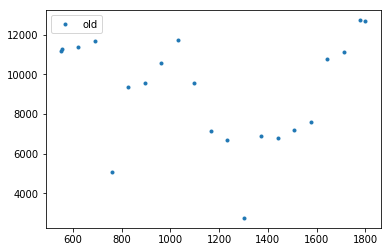

In [431]:
xs, ys = GuessBaseLine1(data, PPS=5, NUM_POINTS=18)
plt.plot(xs, ys,'.' ,label = 'old')
plt.legend()

In [451]:
class InteractivePoints():
    pass

In [433]:
xs, ys = GuessBaseLine1(data, PPS=5, NUM_POINTS=18)




In [335]:
def ReadBase(basefile):
    file = np.genfromtxt(basefile)
    wl, cnt = file[:,0], file[:,1]
    with open('basefile.base') as f:
        interpol = f.readlines()[1].strip().split('=')[-1]
    return wl, cnt, interpol
        
def ReadBase1(basefile):
    interpol='cubic'
    wl, cnt = [],[]
    f = open(basefile)
    for line in f:
        if line[0] == '#':
            if line.find('BTYPE')==1:
                interpol = line.split('=')[-1].strip('\n')
            continue
        else:
            x, y, = line.split()
            wl.append(float(x))
            cnt.append(float(y))
    
    f.close()
    return np.array(wl), np.array(cnt), interpol

In [343]:
wn1, cnt1, interpol1 = ReadBase1('basefile.base')
wn, cnt, interpol = ReadBase('basefile.base')
wn1==wn, cnt1==cnt, interpol1==interpol

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 True)

In [428]:
print('float:%5.1f'%10.1235465468)

float: 10.1
